# Customer Purchase Predictions

The dataset used in this notebook contains various attributes on a customer's purchasing habits. We will investigate the variables in the data to determine which factors have influence on customer purchasing decisions. We will utilize predictive modeling and feature ranking to come to these conclusions.

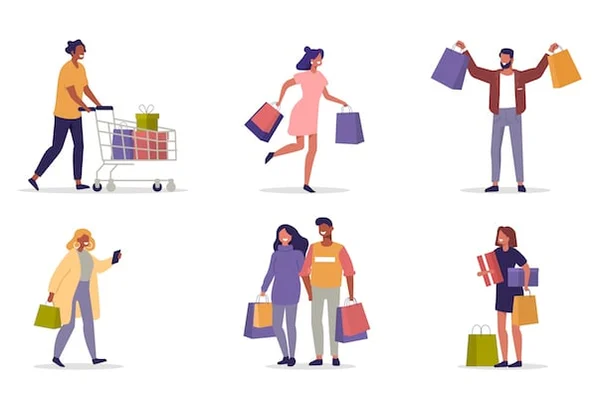

Image: https://blog.hubspot.com/marketing/buying-patterns

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

## Exploratory Data Analysis

### Preprocessing

In [2]:
# Load data
df = pd.read_csv('customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [3]:
# Check for missing values
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [4]:
# Check for duplicates
df.duplicated().sum()

112

In [5]:
# Remove duplicates
df = df.drop_duplicates()

### Visulization

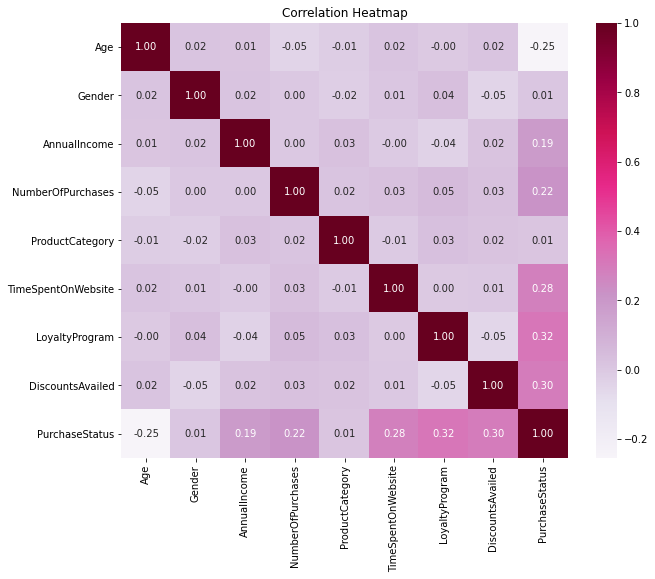

In [6]:
# Correlation matrix
corr = df.corr()

# Create heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'PuRd')
plt.title('Correlation Heatmap')
plt.show()

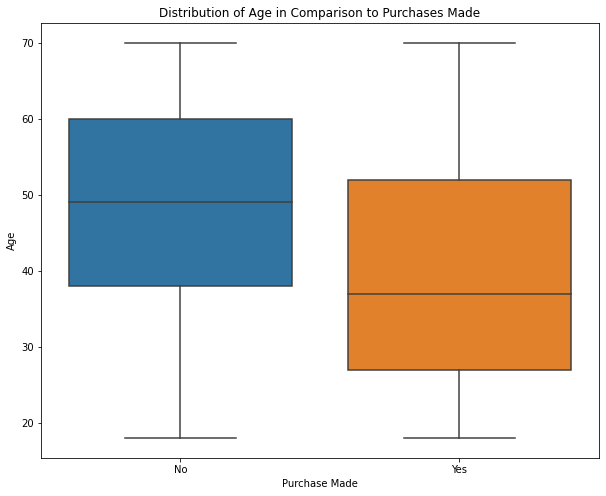

In [7]:
# Create plot for age
plt.figure(figsize = (10, 8))
sns.boxplot(x = df['PurchaseStatus'], y = df['Age'], data = df)
plt.title('Distribution of Age in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

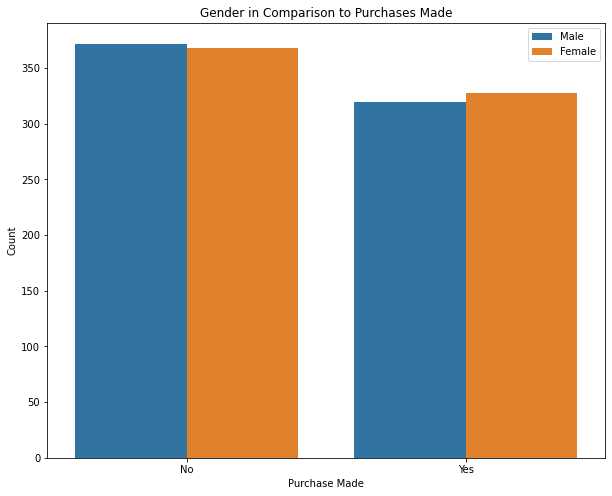

In [8]:
# Create plot for gender
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = df['PurchaseStatus'], hue = df['Gender'])
plt.title('Gender in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Count')
plt.legend(labels = ['Male', 'Female'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

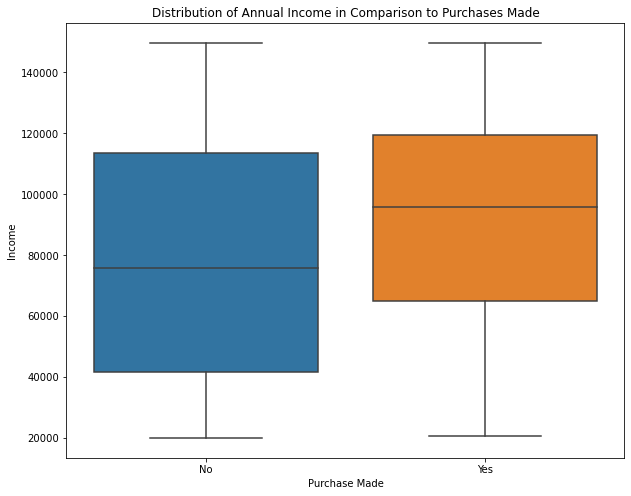

In [9]:
# Create plot for annual income
plt.figure(figsize = (10, 8))
sns.boxplot(x = df['PurchaseStatus'], y = df['AnnualIncome'], data = df)
plt.title('Distribution of Annual Income in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

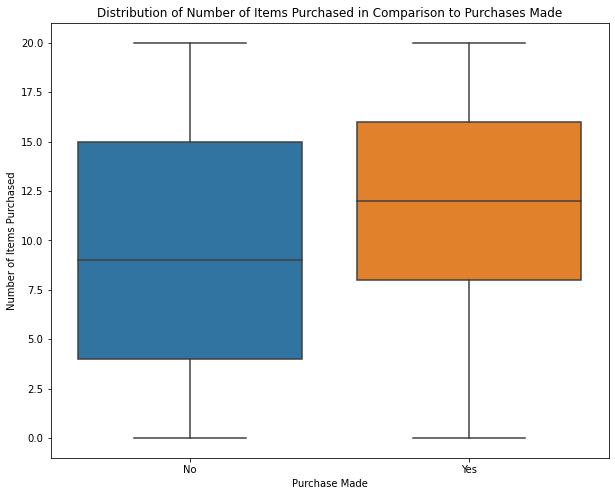

In [10]:
# Create plot for number of items purchased
plt.figure(figsize = (10, 8))
sns.boxplot(x = df['PurchaseStatus'], y = df['NumberOfPurchases'], data = df)
plt.title('Distribution of Number of Items Purchased in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Number of Items Purchased')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

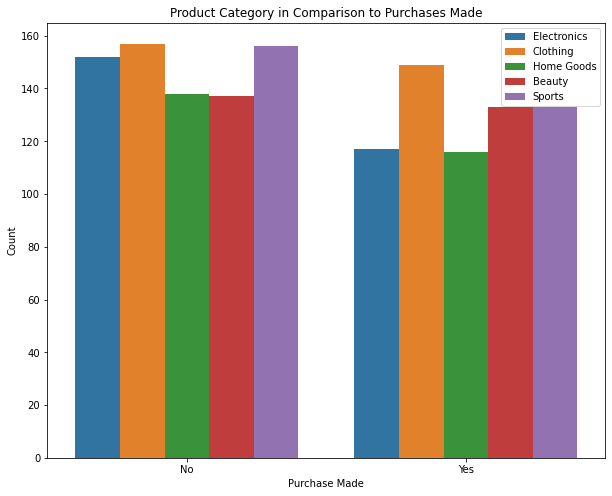

In [11]:
# Create plot for product category
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = df['PurchaseStatus'], hue = df['ProductCategory'])
plt.title('Product Category in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Count')
plt.legend(labels = ['Electronics', 'Clothing', 'Home Goods', 'Beauty', 'Sports'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

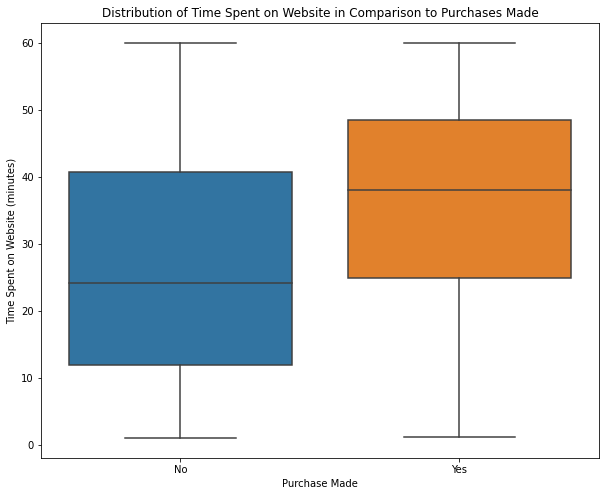

In [12]:
# Create plot for time spent on website
plt.figure(figsize = (10, 8))
sns.boxplot(x = df['PurchaseStatus'], y = df['TimeSpentOnWebsite'], data = df)
plt.title('Distribution of Time Spent on Website in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Time Spent on Website (minutes)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

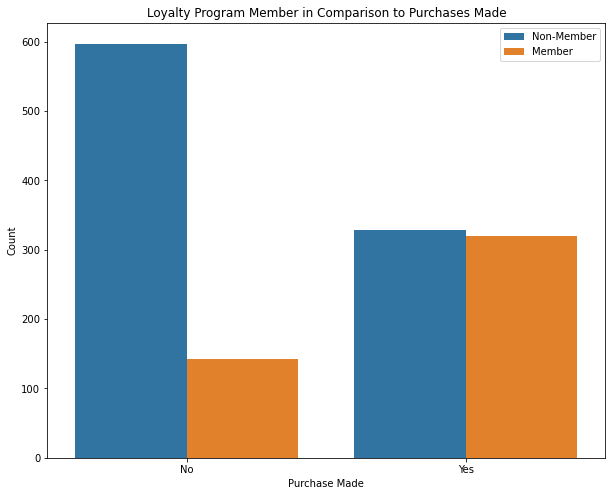

In [13]:
# Create plot for loyaltly program membership
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = df['PurchaseStatus'], hue = df['LoyaltyProgram'])
plt.title('Loyalty Program Member in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Count')
plt.legend(labels = ['Non-Member', 'Member'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

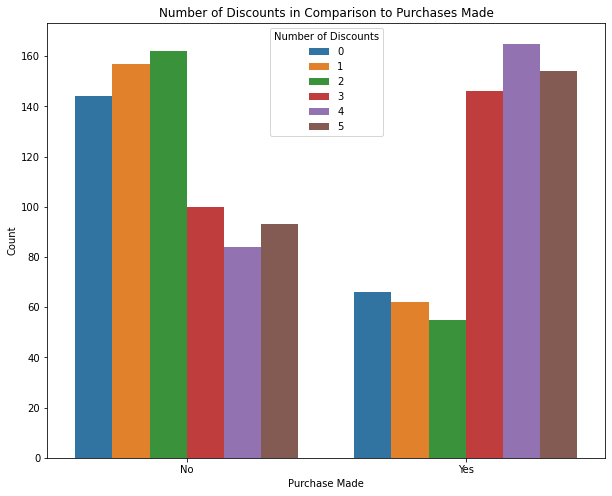

In [14]:
# Create plot for number of discounts available
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = df['PurchaseStatus'], hue = df['DiscountsAvailed'])
plt.title('Number of Discounts in Comparison to Purchases Made')
plt.xlabel('Purchase Made')
plt.ylabel('Count')
plt.legend(title = 'Number of Discounts')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Model Training

In [15]:
X = df.drop(columns = 'PurchaseStatus')
y = df['PurchaseStatus']

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

accuracies = {}

### Logistic Regression

Logistic Regression Results
Accuracy: 0.8525179856115108
Precision: 0.84375
Recall: 0.8372093023255814
F1 Score: 0.8404669260700389


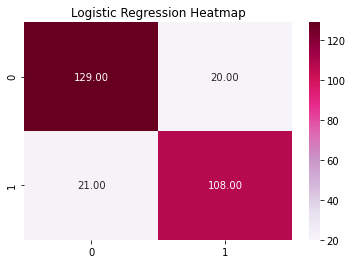

In [16]:
# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['LR'] = accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Logistic Regression Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix heatmap
sns.heatmap(cm, fmt = '.2f', annot = True, cmap = 'PuRd')
plt.title('Logistic Regression Heatmap')
plt.show()

### Decision Tree

Decision Tree Results
Accuracy: 0.8597122302158273
Precision: 0.8515625
Recall: 0.8449612403100775
F1 Score: 0.8482490272373541


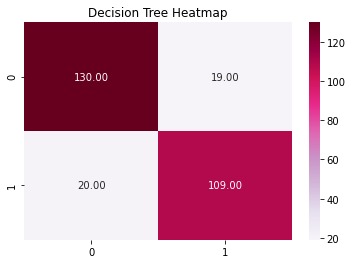

In [17]:
# Fit decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['DT'] = accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Decision Tree Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix heatmap
sns.heatmap(cm, fmt = '.2f', annot = True, cmap = 'PuRd')
plt.title('Decision Tree Heatmap')
plt.show()

### Random Forest

Random Forest Results
Accuracy: 0.935251798561151
Precision: 0.9512195121951219
Recall: 0.9069767441860465
F1 Score: 0.9285714285714286
[0.16654634 0.01523166 0.16320961 0.14137657 0.03748764 0.21000344
 0.10438772 0.16175702]


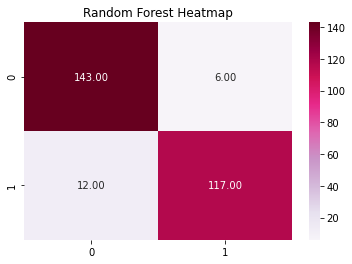

In [18]:
# Fit random forest model
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['RF'] = accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Random Forest Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

print(clf.feature_importances_)

# Confusion matrix heatmap
sns.heatmap(cm, fmt = '.2f', annot = True, cmap = 'PuRd')
plt.title('Random Forest Heatmap')
plt.show()

### Naive Bayes

Naive Bayes Results
Accuracy: 0.8561151079136691
Precision: 0.8449612403100775
Recall: 0.8449612403100775
F1 Score: 0.8449612403100775


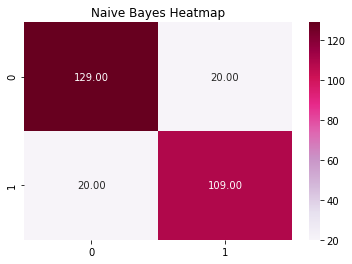

In [19]:
# Fit naive bayes model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['NB'] = accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Naive Bayes Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix heatmap
sns.heatmap(cm, fmt = '.2f', annot = True, cmap = 'PuRd')
plt.title('Naive Bayes Heatmap')
plt.show()

### Support Vector Machine

Support Vector Machine Results
Accuracy: 0.8525179856115108
Precision: 0.8333333333333334
Recall: 0.8527131782945736
F1 Score: 0.842911877394636


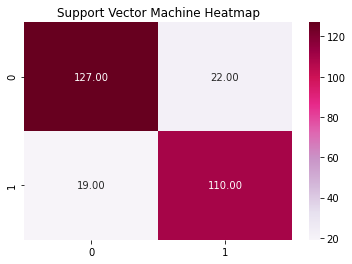

In [20]:
# Fit SVM model
clf = SVC()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['SVC'] = accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Support Vector Machine Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix heatmap
sns.heatmap(cm, fmt = '.2f', annot = True, cmap = 'PuRd')
plt.title('Support Vector Machine Heatmap')
plt.show()

## Results

### Feature Ranking

In [21]:
# Feature rank with recursive feature elimination
estimator = RandomForestClassifier(random_state = 42)
selector = RFE(estimator, n_features_to_select = 1, step = 1)
selector = selector.fit(X_train, y_train)

# Display rankings
for i in range(0, 9):
    for j in range(len(selector.ranking_)):
        if selector.ranking_[j] == i:
            print(f'{i}. {list(X)[j]}')

1. TimeSpentOnWebsite
2. AnnualIncome
3. Age
4. DiscountsAvailed
5. NumberOfPurchases
6. LoyaltyProgram
7. ProductCategory
8. Gender


### Visualization

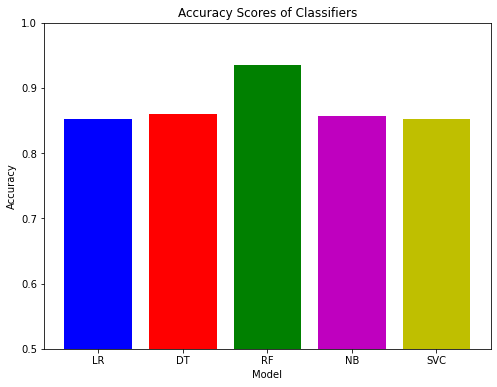

In [22]:
# Create plot for comparing accuracy scores
plt.figure(figsize = (8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color = ['b', 'r', 'g', 'm', 'y'])
plt.ylim(0.5, 1)
plt.title('Accuracy Scores of Classifiers')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Conclusion

With exploratory data analysis and feature ranking, we discover the variables correlating the most to whether a customer makes a purchase. The biggest influence when a customer is deciding on a purchase is the amount of time a customer spent on the website. The variables that follow are annual income, customer age, and number of discounts available.

The Random Forest model is the best choice in this case with the highest accuracy of about 93.5%. It has the highest precison, recall, and F1 scores as well. 